# AI300
### Metrics for Classification

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def my_accuracy_score(y_pred, y_test, L):
  return np.mean(y_pred == y_test)

def my_precision_score(y_pred, y_test, L):
  confusion_mat = confusion_matrix(y_test, y_pred)
  per_label_precision = confusion_mat.diagonal() / np.sum(confusion_mat, axis=0)
  average_precision = np.mean(per_label_precision)

  return {
      'per_label_precision': per_label_precision,
      'average_precision': average_precision
  }

def my_recall_score(y_pred, y_test, L):
  confusion_mat = confusion_matrix(y_test, y_pred)
  per_label_recall = confusion_mat.diagonal() / np.sum(confusion_mat, axis=1)
  average_recall = np.mean(per_label_recall)

  return {
      'per_label_recall': per_label_recall,
      'average_recall': average_recall
  }

def my_f1_score(y_pred, y_test, L):
  precision_dict = my_precision_score(y_pred, y_test, L)
  recall_dict = my_recall_score(y_pred, y_test, L)
  precision = precision_dict['per_label_precision']
  recall = recall_dict['per_label_recall']

  per_label_f1 = 2 * precision * recall / (precision + recall)
  average_f1 = np.mean(per_label_f1)

  return {
      'per_label_f1': per_label_f1,
      'average_f1': average_f1
  }

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

digits = load_digits()
X, y = digits['data'], digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)

labels = 10
accuracy = my_accuracy_score(y_preds, y_test, labels)
precision = my_precision_score(y_preds, y_test, labels)
recall = my_recall_score(y_preds, y_test, labels)
f1_score = my_f1_score(y_preds, y_test, labels)
print(f"Accuracy: {accuracy}")
print(f"Total Precision: {precision['average_precision']}")
print(f"Total Recall: {recall['average_recall']}")
print(f"Total F1 Score: {f1_score['average_f1']}")

conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)

Accuracy: 0.9925925925925926
Total Precision: 0.9932729364394592
Total Recall: 0.9934001027221365
Total F1 Score: 0.9932926951491272
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]


To prove that $f1_k \leq \min{\{2\text{Precision}_k, 2\text{Recall}_k, 1\}}$, we can first show that $f1_k \leq 2\text{Precision}_k$. Setting precision as $P$ and recall as $R$:
$$
f1_k = \frac{2PR}{P+R} \leq 2P
$$
Dividing by $2P$:
$$
\frac{R}{P+R} \leq 1
$$
Because $P$ and $R$ is bound between $0$ and $1$, this equality is always true. We can do a similar thing to prove that $f1_k \leq 2\text{Recall}_k$.
$$
f1_k = \frac{2PR}{P+R} \leq 2P
$$
Dividing by $2R$:
$$
\frac{P}{P+R} \leq 1
$$
And this inequality also holds because $P$ and $R$ are in $[0, 1]$. Finally, we can show that $f1_k \leq 1$. Precision and recall is bounded between $0$ and $1$, as established previously, so plugging these values would give the maximum result of $f1_k$.
$$
f1_k = \frac{2PR}{P+R} = \frac{2(1)(1)}{(1+1)} = \frac{2}{2} = 1
$$
So as a result $f1_k\leq0$ and thus we have proved that $f1_k \leq \min{\{2\text{Precision}_k, 2\text{Recall}_k, 1\}}$.

To bound the F1 score between $0$ and $1$ we can divide by $\min{\{2\text{Precision}_k, 2\text{Recall}_k, 1\}}$ Since $f1_k \leq \min{\{2\text{Precision}_k, 2\text{Recall}_k, 1\}}$, dividing by the right hand term will always yield a number between $0$ and $1$.

$\text{TPR}(\alpha)$ and $\text{FPR}(\alpha)$ are non-increasing in $\alpha$ because as we increase the threshold, we predict less and less positives since we will be making the probability needed to predict postive higher and higher. As a result, TPR and FPR will always decrease because there are less being positives being predicted, meaning we make less true positives and false positives.

As $\alpha$ approaches $-\infty$, $\text{TPR}(\alpha)=1$ and $\text{FPR}(\alpha)=1$because approaching $-\infty$ means we will be predicting more and more and eventually *all* of the values in the dataset as positive. Predicting all of the dataset as positive means that we will have a TPR of $1$ since we have predicted every value as positive, so we will not incorrectly classify any true positives, but we will also misclassify every true negative, producing a FPR of $1$ as well.

We can use a similar process to show that as $\alpha$ approchaes $\infty$, $\text{TPR}(\alpha)=0$ and $\text{FPR}(\alpha)=0$. Here, we will eventually predict all of the values in the dataset as negative. We won't correctly classify anything that is a true positive since we predicted everything as negative, so TPR is $0$, but we also won't have any false positives since we predicted nothing as positive in the first place, so FPR is also $0$.

To prove that the ROC curve has endpoints $(0, 0)$ and $(1, 1)$, we can consider that TPR and FPR are both probabilities. The greatest possible FPR and TPR is $0$ and the smallest is $0$. Then the endpoints would be $(0, 0)$ and $(1, 1)$ since FPR and TPR or on the axes, so those endpoints would represent when $\text{TPR} = \text{FPR} = 0$ and $\text{TPR} = \text{FPR} = 1$.

The ROC curve is non-decreasing because it plots FPR vs TPR. So we can prove that the ROC curve is non-decreasing if we can show that TPR does not decrease as FPR increases. Increasing the FPR rate means lowering the classification threshold and predicting more of the dataset as positives (when they are actually negative, increasing FPR). TPR will not decrease when we lower the threshold since we are keeping the correctly predicted positives unchanged, so the ROC curve is non-decreasing.

To prove that AUC is always bounded between 0 and 1, we can consider the shape form of TPR and FPR. TPR and FPR are both just probabilities, so by definition they range from $0$ to $1$. As a result, the $x$-axis and $y$-axis both would range from $0$ to $1$ as well. This means AUC, which is the area under the ROC curve, would have to be between $0$ and $1$, since area cannot be negative (so it can't be less than $0$) and it is measuring *at most* the area of the unit square, which cannot be greater than $1$.

In [7]:
import numpy as np

def my_roc_curve(y_true, y_score, pos_label=1):
  num_pos = np.sum(y_true == pos_label)
  num_neg = np.sum(y_true != pos_label)

  thresholds = np.concatenate([np.array([np.inf]), np.sort(y_score)[::-1]])

  tp = y_score[y_true == pos_label, np.newaxis] >= thresholds
  fp = y_score[y_true != pos_label, np.newaxis] >= thresholds
  tpr = np.sum(tp, axis=0) / num_pos
  fpr = np.sum(fp, axis=0) / num_neg

  return fpr, tpr, thresholds

In [8]:
import numpy as np

def my_roc_auc_score(y_true, y_score, pos_label=1):
  fpr, tpr, thresholds = my_roc_curve(y_true, y_score, pos_label)
  roc_auc = np.trapezoid(tpr, fpr)

  return roc_auc

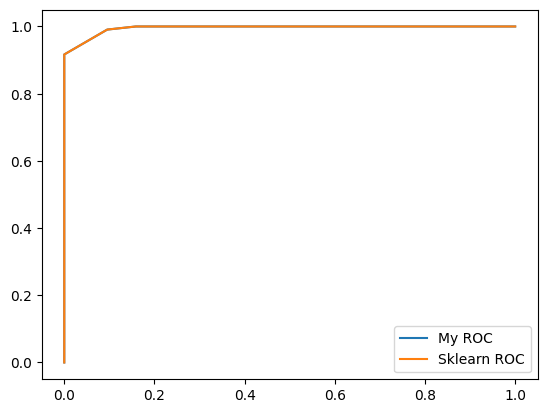

My AUC: 0.9952968841857731
Sklearn AUC: 0.995296884185773


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

dataset = load_breast_cancer()
X, y = dataset["data"], dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_scores = knn.predict_proba(X_test)[:, 1]

my_fpr, my_tpr, my_thresholds = my_roc_curve(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(my_fpr, my_tpr, label="My ROC")
plt.plot(fpr, tpr, label="Sklearn ROC")
plt.legend()
plt.show()
# There is only one color, which means that the sklearn ROC overlaid my ROC
# So they are the same!

my_auc = my_roc_auc_score(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)
print(f"My AUC: {my_auc}")
print(f"Sklearn AUC: {auc}")